In [1]:
import cupy as cp 
import numpy as np
import pygraphblas as gb

# Check if connected to GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU: need to configure runtime type to an environment with an accessible GPU')
else:
    print('Connected to a GPU - GPU info summary: \n\n' + gpu_info)

Connected to a GPU - GPU info summary: 

Mon Nov 11 21:07:21 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.41                 Driver Version: 561.03         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti     On  |   00000000:01:00.0  On |                  N/A |
| 32%   28C    P8              6W /  160W |    1125MiB /   8188MiB |      8%      Default |
|                                         |                        |                  N/A |
+------

In [31]:
# Trying out a non-matrix graph library called cuGraph which also uses GPU
# import cugraph
# import cudf

# # Sample edge list
# src = cudf.Series([0, 1, 2, 3, 4])
# dst = cudf.Series([1, 2, 3, 4, 0])

# # Create a Graph
# G = cugraph.Graph(directed=True)
# G.from_cudf_edgelist(cudf.DataFrame({'src': src, 'dst': dst}), source='src', destination='dst')

# # Get the list of edges
# edges_df = G.view_edge_list().sort_values(by=['src', 'dst'])

# # Get the list of nodes (unique vertices)
# nodes_df = cudf.concat([edges_df['src'], edges_df['dst']]).unique()

# # Initialize an empty incidence matrix with zeros
# num_nodes = len(nodes_df)
# adj_matrix = cp.zeros((num_nodes, num_nodes), dtype=np.int32)

# # Iterate through edges and update the incidence matrix
# for _, edge in enumerate(edges_df.to_pandas().iterrows()):
#     i, j = edge[1]['src'], edge[1]['dst']

#     # Set the incidence for the source and destination nodes
#     adj_matrix[i, j] = 1

# # Convert to a cuDF DataFrame for easier viewing
# adj_matrix_df = cudf.DataFrame(adj_matrix)
# print(adj_matrix_df)

In [2]:
# Use python wrapper of GraphBLAS on GPU (BLAS - Basic Linear Algebra Subprograms)
# GraphBLAS supports graph operations via linear algebraic methods (e.g. matrix multiplication) over various semirings

# GraphBLAS version of BMLP-RMS algorithm which performs repeated matrix squaring
from bmlp.matrix import *

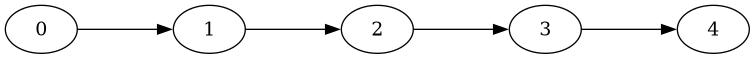

In [33]:
# Simple graph example 1
# Create edge list (directed graph) and the number of nodes (matrix dimension)
edges = [(0, 1), (1, 2), (2, 3), (3, 4)]
num_nodes = 5

import pygraphviz as gviz
G_visual = gviz.AGraph(directed=True)
G_visual.add_edges_from(edges)
G_visual.draw("simple_ex1.png",prog="circo")

from IPython.display import Image

# Provide the path to your local image
Image("simple_ex1.png")

In [34]:
# Create a square adjacency matrix using BOOL type
R1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

# Insert edges into the adjacency matrix
for src, dst in edges:
    R1[src, dst] = True
print('R1 = \n'+ str(R1) + '\n')
        
# Print the transitive closure matrix
print('closure R2* = \n' + str(BMLP_RMS(R1, print_matrix=True)) + '\n')

R1 = 
      0  1  2  3  4
  0|     t         |  0
  1|        t      |  1
  2|           t   |  2
  3|              t|  3
  4|               |  4
      0  1  2  3  4

R = R2 + I = 
      0  1  2  3  4
  0|  t  t         |  0
  1|     t  t      |  1
  2|        t  t   |  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

fixpoint = 
      0  1  2  3  4
  0|  t  t  t      |  0
  1|     t  t  t   |  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

fixpoint = 
      0  1  2  3  4
  0|  t  t  t  t  t|  0
  1|     t  t  t  t|  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

fixpoint = 
      0  1  2  3  4
  0|  t  t  t  t  t|  0
  1|     t  t  t  t|  1
  2|        t  t  t|  2
  3|           t  t|  3
  4|              t|  4
      0  1  2  3  4

R0* = 
      0  1  2  3  4
  0|     t  t  t  t|  0
  1|        t  t  t|  1
  2|           t  t|  2
  3|              t|  3
  4|            

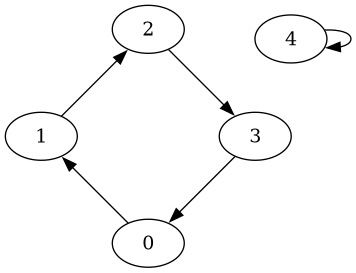

In [35]:
# Simple graph example 2
# Create edge list (directed graph) and the number of nodes (matrix dimension)
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (4, 4)]
num_nodes = 5

G_visual = gviz.AGraph(directed=True)
G_visual.add_edges_from(edges)
G_visual.draw("simple_ex2.png",prog="circo")

# Provide the path to your local image
Image("simple_ex2.png")

In [36]:
# Create a square adjacency matrix using BOOL type
R1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

# Insert edges into the adjacency matrix
for src, dst in edges:
    R1[src, dst] = True
print('R1 = \n'+ str(R1) + '\n')
        
# Print the transitive closure matrix
print('closure R2* = \n' + str(BMLP_RMS(R1)) + '\n')

R1 = 
      0  1  2  3  4
  0|     t         |  0
  1|        t      |  1
  2|           t   |  2
  3|  t            |  3
  4|              t|  4
      0  1  2  3  4

closure R2* = 
      0  1  2  3  4
  0|  t  t  t  t   |  0
  1|  t  t  t  t   |  1
  2|  t  t  t  t   |  2
  3|  t  t  t  t   |  3
  4|              t|  4
      0  1  2  3  4



In [37]:
# Create a vector to represent a query
V = gb.Vector.sparse(gb.BOOL, num_nodes)

# query the reachability of node 3
V[3] = True

print('closure V* = \n' + str(BMLP_SMP(V,R1)) + '\n')

closure V* = 
0| t
1| t
2| t
3| t
4|



In [38]:
# import random, time

# # Complex graph
# num_nodes = 5000
# all_edges = [(i, j) for i in range(num_nodes) for j in range(num_nodes)]
# print('No. edges: ' + str(len(all_edges)))

In [39]:
# num_reps = 10
# p = 0.5
# total_time = 0

# # repeat num_reps times
# for i in range(num_reps):

#     # sample edges with edge probability < p
#     sampled_edges = list(filter(lambda _: random.random() < p, all_edges))

#     # Create a square adjacency matrix using BOOL type
#     empty_matrix = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
#     R1 = empty_matrix

#     # Insert edges into the adjacency matrix
#     for src, dst in sampled_edges:
#         R1[src, dst] = True

#     # Run and time the BMLP-RMS module
#     start_time = time.time()
#     BMLP_RMS(R1)
#     end_time = time.time()

#     total_time += end_time - start_time
#     print('Wall time: ' + str(end_time - start_time))

# print('Mean wall time: ' + str(total_time / num_reps))


In [40]:
# num_reps = 10
# p = 0.01
# total_time = 0

# # repeat num_reps times
# for i in range(num_reps):

#     # sample edges with edge probability < p
#     sampled_edges = list(filter(lambda _: random.random() < p, all_edges))

#     # Create a square adjacency matrix using BOOL type
#     empty_matrix = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
#     R1 = empty_matrix

#     # Insert edges into the adjacency matrix
#     for src, dst in sampled_edges:
#         R1[src, dst] = True
        
#     # Create a vector to represent a query
#     V = gb.Vector.sparse(gb.BOOL, num_nodes)

#     # query the reachability of node 3
#     V[1] = True

#     # Run and time the BMLP-SMP module
#     start_time = time.time()
#     BMLP_SMP(V,R1)
#     end_time = time.time()

#     total_time += end_time - start_time
#     print('Wall time: ' + str(end_time - start_time))

# print('Mean wall time: ' + str(total_time / num_reps))

In [41]:
# Create a sequence of boolean matrix operations to compute
#   p0(X1, X2) :- p1(X1, X3), p2(X3, X4), p3(X4, X2).
num_nodes = 5
p1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p2 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p3 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

p1[0,1] = True
print('p1 = \n' + str(p1) + '\n')

p2[1,2] = True
print('p2 = \n' + str(p2) + '\n')

p3[2,3] = True
print('p3 = \n' + str(p3) + '\n')

# exactly-two-connected program in chained H2m
p0 = p1 @ p2 @ p3
print('p0 = \n' + str(p0) + '\n')

p1 = 
      0  1  2  3  4
  0|     t         |  0
  1|               |  1
  2|               |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p2 = 
      0  1  2  3  4
  0|               |  0
  1|        t      |  1
  2|               |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p3 = 
      0  1  2  3  4
  0|               |  0
  1|               |  1
  2|           t   |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p0 = 
      0  1  2  3  4
  0|           t   |  0
  1|               |  1
  2|               |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4



In [42]:
# Create a sequence of boolean matrix operations to compute
#   p0(X1, X2) :- p1(X2, X1).
#   p0(X1, X2) :- p2(X1, X3), p3(X3, X4), p0(X4, X2).
num_nodes = 5
p1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p2 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p3 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

p1[1,0] = True
print('p1 = \n' + str(p1) + '\n')

p2[1,2] = True
p2[3,4] = True
print('p2 = \n' + str(p2) + '\n')

p3[2,3] = True
p3[4,0] = True
print('p3 = \n' + str(p3) + '\n')

print('p2 x p3 = \n' + str(p2 @ p3) + '\n')

# exactly-two-connected recursion in chained H2m
p0 = BMLP_RMS(p1.T,p2 @ p3,print_matrix=True)
print('p0 = \n' + str(p0) + '\n')

p1 = 
      0  1  2  3  4
  0|               |  0
  1|  t            |  1
  2|               |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p2 = 
      0  1  2  3  4
  0|               |  0
  1|        t      |  1
  2|               |  2
  3|              t|  3
  4|               |  4
      0  1  2  3  4

p3 = 
      0  1  2  3  4
  0|               |  0
  1|               |  1
  2|           t   |  2
  3|               |  3
  4|  t            |  4
      0  1  2  3  4

p2 x p3 = 
      0  1  2  3  4
  0|               |  0
  1|           t   |  1
  2|               |  2
  3|  t            |  3
  4|               |  4
      0  1  2  3  4

R = R2 + I = 
      0  1  2  3  4
  0|  t            |  0
  1|     t     t   |  1
  2|        t      |  2
  3|  t        t   |  3
  4|              t|  4
      0  1  2  3  4

fixpoint = 
      0  1  2  3  4
  0|  t            |  0
  1|  t  t     t   |  1
  2|        t      |  2
  3|  t        t   |  3
  4|              t|  4


In [ ]:
# Create a sequence of boolean matrix operations to compute
#   p0(X1, X2) :- p1(X1, X3), p2(X1, X4), p3(X2, X3), p4(X2, X4), p5(X3, X4).
num_nodes = 5
p1 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p2 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p3 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p4 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)
p5 = gb.Matrix.sparse(gb.BOOL, num_nodes, num_nodes)

p1[1,3] = True
print('p1 = \n' + str(p1) + '\n')

p2[1,4] = True
print('p2 = \n' + str(p2) + '\n')

p3[2,3] = True
print('p3 = \n' + str(p3) + '\n')

p4[2,4] = True
print('p4 = \n' + str(p4) + '\n')

p5[3,4] = True
print('p5 = \n' + str(p5) + '\n')

p0 = p1 @ p5 @ p4.T * (p2 @ p5.T @ p3.T)
print('p0 = \n' + str(p0) + '\n')

p1 = 
      0  1  2  3  4
  0|               |  0
  1|           t   |  1
  2|               |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p2 = 
      0  1  2  3  4
  0|               |  0
  1|              t|  1
  2|               |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p3 = 
      0  1  2  3  4
  0|               |  0
  1|               |  1
  2|           t   |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p4 = 
      0  1  2  3  4
  0|               |  0
  1|               |  1
  2|              t|  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

p5 = 
      0  1  2  3  4
  0|               |  0
  1|               |  1
  2|               |  2
  3|              t|  3
  4|               |  4
      0  1  2  3  4

p0 = 
      0  1  2  3  4
  0|               |  0
  1|        t      |  1
  2|               |  2
  3|               |  3
  4|               |  4
      0  1  2  3  4

In [ ]:
# import pygraphblas as gb
# from bmlp.matrix import *

# # Test BMLP-IE on BMLP_active datasets
# R1 = integers_to_boolean_matrix("mstate1")
# T = integers_to_boolean_matrix("mstate2")
# R2 = integers_to_boolean_matrix("mstate3")
# V = integers_to_boolean_matrix("mstate5")
# res = BMLP_IE(V,R1,R2,T=T)
# boolean_matrix_to_integers(res,"mstate10","mstate10")

      0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331